In [1]:
import tensorflow as tf
import pandas as pd

tf.compat.v1.disable_v2_behavior()

import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow.keras.preprocessing
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Add, Multiply
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation, BatchNormalization
# regularizers
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout
from scipy import signal
import openpyxl

data_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2011_smd_hourly.xls'
data_source_2011 = pd.read_excel(data_path_2011, sheet_name='ISONE CA')
data_source_2011 = pd.DataFrame(data_source_2011)
data_set_2011 = data_source_2011.iloc[:, -4:-1]
data_set_2011 = np.array(data_set_2011)

data_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2012_smd_hourly.xls'
data_source_2012 = pd.read_excel(data_path_2012, sheet_name='ISONE CA')
data_source_2012 = pd.DataFrame(data_source_2012)
data_set_2012a = np.array(data_source_2012.iloc[:1416, -4:-1])
data_set_2012b = np.array(data_source_2012.iloc[1440:, -4:-1])
data_set_2012 = np.vstack([data_set_2012a, data_set_2012b])
data_set_2012 = np.array(data_set_2012)

data_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2013_smd_hourly.xls'
data_source_2013 = pd.read_excel(data_path_2013, sheet_name='ISONE CA')
data_source_2013 = pd.DataFrame(data_source_2013)
data_set_2013 = data_source_2013.iloc[:, -4:-1]
data_set_2013 = np.array(data_set_2013)

data_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2014_smd_hourly.xls'
data_source_2014 = pd.read_excel(data_path_2014, sheet_name='ISONE CA')
data_source_2014 = pd.DataFrame(data_source_2014)
data_set_2014 = data_source_2014.iloc[:, -4:-1]
data_set_2014 = np.array(data_set_2014)

data_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2015_smd_hourly.xls'
data_source_2015 = pd.read_excel(data_path_2015, sheet_name='ISONE CA')
data_source_2015 = pd.DataFrame(data_source_2015)
data_set_2015 = data_source_2015.iloc[:, -4:-1]
data_set_2015 = np.array(data_set_2015)

data_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2016_smd_hourly.xls'
data_source_2016 = pd.read_excel(data_path_2016, sheet_name='ISO NE CA')
data_source_2016 = pd.DataFrame(data_source_2016)
data_set_2016a = np.array(data_source_2016.iloc[:1416, -5:-2])
data_set_2016b = np.array(data_source_2016.iloc[1440:, -5:-2])
data_set_2016 = np.vstack([data_set_2016a, data_set_2016b])
data_set_2016 = np.array(data_set_2016)

data_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2017_smd_hourly.xlsx'
data_source_2017 = pd.read_excel(data_path_2017, sheet_name='ISO NE CA')
data_source_2017 = pd.DataFrame(data_source_2017)
data_set_2017 = data_source_2017.iloc[:, -9:-6]
data_set_2017 = np.array(data_set_2017)

data_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2018_smd_hourly.xlsx'
data_source_2018 = pd.read_excel(data_path_2018, sheet_name='ISO NE CA')
data_source_2018 = pd.DataFrame(data_source_2018)
data_set_2018 = data_source_2018.iloc[:, -9:-6]
data_set_2018 = np.array(data_set_2018)

data_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Load_data/2019_smd_hourly.xlsx'
data_source_2019 = pd.read_excel(data_path_2019, sheet_name='ISO NE CA')
data_source_2019 = pd.DataFrame(data_source_2019)
data_set_2019 = data_source_2019.iloc[:, -9:-6]
data_set_2019 = np.array(data_set_2019)

load = np.vstack([data_set_2011, data_set_2012, data_set_2013, data_set_2014, data_set_2015, data_set_2016, data_set_2017, data_set_2018, data_set_2019])
print(data_set_2011.shape)
print(data_set_2012.shape)
print(data_set_2013.shape)
print(data_set_2014.shape)
print(data_set_2015.shape)
print(data_set_2016.shape)
print(data_set_2017.shape)
print(data_set_2018.shape)
print(data_set_2019.shape)
print(load.shape)

pv_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2011.xlsx'
pv_source_2011 = pd.read_excel(pv_path_2011, sheet_name='HourlyData')
pv_source_2011 = pd.DataFrame(pv_source_2011)
pv_set_2011 = pv_source_2011.iloc[:, 3]
pv_set_2011 = pv_set_2011.fillna(0)
pv_set_2011 = np.array(pv_set_2011)
pv_set_2011 = pv_set_2011.reshape(-1,1)

pv_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2012.xlsx'
pv_source_2012 = pd.read_excel(pv_path_2012, sheet_name='HourlyData')
pv_source_2012 = pd.DataFrame(pv_source_2012)
pv_source_2012 = pv_source_2012.fillna(0)
pv_set_2012a = np.array(pv_source_2012.iloc[:1416, 3])
pv_set_2012b = np.array(pv_source_2012.iloc[1440:, 3])
pv_set_2012 = np.concatenate((pv_set_2012a, pv_set_2012b), axis=None)
pv_set_2012 = np.array(pv_set_2012)
pv_set_2012 = pv_set_2012.reshape(-1,1)

pv_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2013.xlsx'
pv_source_2013 = pd.read_excel(pv_path_2013, sheet_name='HourlyData')
pv_source_2013 = pd.DataFrame(pv_source_2013)
pv_set_2013 = pv_source_2013.iloc[:, 3]
pv_set_2013 = pv_set_2013.fillna(0)
pv_set_2013 = np.array(pv_set_2013)
pv_set_2013 = pv_set_2013.reshape(-1,1)

pv_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2014.xlsx'
pv_source_2014 = pd.read_excel(pv_path_2014, sheet_name='HourlyData')
pv_source_2014 = pd.DataFrame(pv_source_2014)
pv_set_2014 = pv_source_2014.iloc[:, 3]
pv_set_2014 = pv_set_2014.fillna(0)
pv_set_2014 = np.array(pv_set_2014)
pv_set_2014 = pv_set_2014.reshape(-1,1)

pv_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2015.xlsx'
pv_source_2015 = pd.read_excel(pv_path_2015, sheet_name='HourlyData')
pv_source_2015 = pd.DataFrame(pv_source_2015)
pv_set_2015 = pv_source_2015.iloc[:, 3]
pv_set_2015 = pv_set_2015.fillna(0)
pv_set_2015 = np.array(pv_set_2015)
pv_set_2015 = pv_set_2015.reshape(-1,1)

pv_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2016.xlsx'
pv_source_2016 = pd.read_excel(pv_path_2016, sheet_name='HourlyData')
pv_source_2016 = pd.DataFrame(pv_source_2016)
pv_source_2016 = pv_source_2016.fillna(0)
pv_set_2016a = np.array(pv_source_2016.iloc[:1416, 3])
pv_set_2016b = np.array(pv_source_2016.iloc[1440:, 3])
pv_set_2016 = np.concatenate((pv_set_2016a, pv_set_2016b), axis=None)
pv_set_2016 = np.array(pv_set_2016)
pv_set_2016 = pv_set_2016.reshape(-1,1)

pv_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2017.xlsx'
pv_source_2017 = pd.read_excel(pv_path_2017, sheet_name='HourlyData')
pv_source_2017 = pd.DataFrame(pv_source_2017)
pv_set_2017 = pv_source_2017.iloc[:, 3]
pv_set_2017 = pv_set_2017.fillna(0)
pv_set_2017 = np.array(pv_set_2017)
pv_set_2017 = pv_set_2017.reshape(-1,1)

pv_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2018.xlsx'
pv_source_2018 = pd.read_excel(pv_path_2018, sheet_name='HourlyData')
pv_source_2018 = pd.DataFrame(pv_source_2018)
pv_set_2018 = pv_source_2018.iloc[:, 3]
pv_set_2018 = pv_set_2018.fillna(0)
pv_set_2018 = np.array(pv_set_2018)
pv_set_2018 = pv_set_2018.reshape(-1,1)

pv_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/Solar_data/hourly_solar_gen_2019.xlsx'
pv_source_2019 = pd.read_excel(pv_path_2019, sheet_name='HourlyData')
pv_source_2019 = pd.DataFrame(pv_source_2019)
pv_set_2019 = pv_source_2019.iloc[:, 3]
pv_set_2019 = pv_set_2019.fillna(0)
pv_set_2019 = np.array(pv_set_2019)
pv_set_2019 = pv_set_2019.reshape(-1,1)

pv = np.concatenate((pv_set_2011, pv_set_2012, pv_set_2013, pv_set_2014, pv_set_2015, pv_set_2016, pv_set_2017, pv_set_2018, pv_set_2019), axis=None)
pv = pv.reshape(-1,1)
print(pv.shape)

weather_path_2011 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2011.csv'
weather_source_2011 = pd.read_csv(weather_path_2011)
weather_source_2011 = pd.DataFrame(weather_source_2011)
weather_set_2011 = weather_source_2011.iloc[2:, 5:16]
weather_set_2011 = np.array(weather_set_2011, dtype='float')

weather_path_2012 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2012.csv'
weather_source_2012 = pd.read_csv(weather_path_2012)
weather_source_2012 = pd.DataFrame(weather_source_2012)
weather_set_2012 = weather_source_2012.iloc[2:, 5:16]
weather_set_2012 = np.array(weather_set_2012, dtype='float')

weather_path_2013 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2013.csv'
weather_source_2013 = pd.read_csv(weather_path_2013)
weather_source_2013 = pd.DataFrame(weather_source_2013)
weather_set_2013 = weather_source_2013.iloc[2:, 5:16]
weather_set_2013 = np.array(weather_set_2013, dtype='float')

weather_path_2014 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2014.csv'
weather_source_2014 = pd.read_csv(weather_path_2014)
weather_source_2014 = pd.DataFrame(weather_source_2014)
weather_set_2014 = weather_source_2014.iloc[2:, 5:16]
weather_set_2014 = np.array(weather_set_2014, dtype='float')

weather_path_2015 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2015.csv'
weather_source_2015 = pd.read_csv(weather_path_2015)
weather_source_2015 = pd.DataFrame(weather_source_2015)
weather_set_2015 = weather_source_2015.iloc[2:, 5:16]
weather_set_2015 = np.array(weather_set_2015, dtype='float')

weather_path_2016 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2016.csv'
weather_source_2016 = pd.read_csv(weather_path_2016)
weather_source_2016 = pd.DataFrame(weather_source_2016)
weather_set_2016 = weather_source_2016.iloc[2:, 5:16]
weather_set_2016 = np.array(weather_set_2016, dtype='float')

weather_path_2017 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2017.csv'
weather_source_2017 = pd.read_csv(weather_path_2017)
weather_source_2017 = pd.DataFrame(weather_source_2017)
weather_set_2017 = weather_source_2017.iloc[2:, 5:16]
weather_set_2017 = np.array(weather_set_2017, dtype='float')

weather_path_2018 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2018.csv'
weather_source_2018 = pd.read_csv(weather_path_2018)
weather_source_2018 = pd.DataFrame(weather_source_2018)
weather_set_2018 = weather_source_2018.iloc[2:, 5:16]
weather_set_2018 = np.array(weather_set_2018, dtype='float')

weather_path_2019 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/weather_data/Boston_all/1321931_42.33_-71.62_2019.csv'
weather_source_2019 = pd.read_csv(weather_path_2019)
weather_source_2019 = pd.DataFrame(weather_source_2019)
weather_set_2019 = weather_source_2019.iloc[2:, 5:16]
weather_set_2019 = np.array(weather_set_2019, dtype='float')

weather = np.vstack((weather_set_2011, weather_set_2012, weather_set_2013, weather_set_2014, weather_set_2015, weather_set_2016, weather_set_2017, weather_set_2018, weather_set_2019))
print(weather_set_2011.shape)
print(weather_set_2012.shape)
print(weather_set_2013.shape)
print(weather_set_2014.shape)
print(weather_set_2015.shape)
print(weather_set_2016.shape)
print(weather_set_2017.shape)
print(weather_set_2018.shape)
print(weather_set_2019.shape)
print(weather.shape)

weather_dat = np.zeros(shape=(78840,11))
print(weather[1,:])
print(weather[2,:])
print(weather[3,:])
for i in range(78840):
    weather_dat[i,:] = np.add(weather[2*i,:],weather[2*i+1,:])
weather_dat = np.true_divide(weather_dat,2)
print(weather_dat)
print(weather_dat.shape)

Instructions for updating:
non-resource variables are not supported in the long term
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(8760, 3)
(78840, 3)
(78840, 1)


C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(17520, 11)
(157680, 11)
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5896e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5579e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.5161e+02 8.6600e-01 1.0000e-01 1.0000e+02]
[[  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 [  0.      0.      0.    ...   0.866   0.1   100.   ]
 ...
 [  0.      0.      0.    ...   0.11    0.4    97.18 ]
 [  0.      0.      0.    ...   0.11    0.4    96.97 ]
 [  0.      0.      0.    ...   0.11    0.4    97.225]]
(78840, 11)


In [2]:
dataall = np.hstack([load, pv, weather_dat])
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']
dataall = np.vstack([index, dataall])
print(dataall.shape)
print(max(dataall[1:,2]))

(78841, 15)
9999.0


In [3]:
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,36.0,29.0,12214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.77,0.866,0.1,100.0
1,36.0,29.0,11573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.7,0.866,0.1,100.0
2,35.0,29.0,11114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.23000000000002,0.866,0.1,100.0
3,35.0,30.0,10863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.525,0.866,0.1,100.0
4,36.0,31.0,10827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.47500000000001,0.866,0.1,100.0


In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)

In [5]:
import seaborn as sns
from keijzer import *
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout, Activation, Multiply
from tensorflow.keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import activations
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import math

def get_flops(model):
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()

    # We use the Keras session graph in the call to the profiler.
    flops = tf.profiler.profile(graph=K.get_session().graph,
                                run_meta=run_meta, cmd='op', options=opts)

    return flops.total_float_ops  # Prints the "flops" of the model.

class LossHistory(tensorflow.keras.callbacks.Callback):  # history = LossHistory()
    def init(self):  # history.init()
        self.losses = []
        # self.accs = []
        self.val_losses = []
        # self.val_accs = []
        self.rmses = []
        self.mses = []
        self.maes = []
        self.mapes = []
        self.val_rmses = []
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        # self.val_accs.append(logs.get('val_accuracy
        self.rmses.append(logs.get('root_mean_squared_error'))
        self.mses.append(logs.get('mean_squared_error'))
        self.maes.append(logs.get('mean_absolute_error'))
        self.mapes.append(logs.get('mean_absolute_percentage_error'))
        self.val_rmses.append(logs.get('val_root_mean_squared_error'))
        self.val_mses.append(logs.get('val_mean_squared_error'))
        self.val_maes.append(logs.get('val_mean_absolute_error'))
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [6]:
norm_df = np.array(norm_df)
def create_dataset(dataset, timesteps, output_timesteps):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps -output_timesteps - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[(i + timesteps):(i+timesteps+output_timesteps), :])
    return np.array(dataX), np.array(dataY)

timesteps = 22
output_timesteps = 1
X, Y = create_dataset(norm_df, timesteps, output_timesteps)

print(X.shape)
print(Y.shape)

(78816, 22, 15)
(78816, 1, 15)


In [7]:
trX = X[:47286, :, :]
vaX = X[47286:55174, :, :]
teX = X[55174:, :, :]
trY = Y[:47286, :, 2]
vaY = Y[47286:55174,:, 2]
teY = Y[55174:, :, 2]

print(trX.shape)
print(trY.shape)
print(teX.shape)
print(teY.shape)

(47286, 22, 15)
(47286, 1)
(23642, 22, 15)
(23642, 1)


In [8]:
with tf.device('/gpu:0'):
    alpha=1
    gamma=1.2
    beta = 1.089658
    num_features = 15
    hfilters = 128
    hkernel_size1 = 2
    hkernel_size2 = 4
    visible1 = Input(shape=(timesteps, num_features))
    per1 = Permute((2,1))(visible1)
    den1a = Dense(timesteps, activation='tanh')(per1)
    den1b = Dense(timesteps, activation='sigmoid')(per1)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vec')(den1)
    mul1 = Multiply()([visible1, per2])
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res01 = Add()([d1, visible1])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res02 = Add()([d1, res01])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res03 = Add()([d1, res02])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res04 =Add()([d1, res03])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res04)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=32)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res05 = Add()([d1, res04])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=32)(res05) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res06 = Add()([d1, res05])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res06) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res07 = Add()([d1, res06])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res07)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res08 = Add()([d1, res07])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res08)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res09 = Add()([d1, res08])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res09) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res10 = Add()([d1, res09])   # 
    
    print('res10 :', res10.shape)  # (None, 24, 11) 
    
    out = Conv1D(512, 1, padding='same', activation='relu')(res10)   # 256, 11X10=110  
    out = Dropout(0.2)(out)   
    
    out = Conv1D(256, 1, padding='same', activation='relu')(out) # 512,  110X5=550
    out = Dropout(0.2)(out)  
    
    out = GlobalAveragePooling1D()(out) # pool_size=2, strides=1
    
    out = Dense(output_timesteps)(out) 
    model = Model(inputs=[visible1], outputs=[out])
    
    print(model.summary())
    
    model.compile(loss=root_mean_squared_error, optimizer='adam', metrics=[root_mean_squared_error, 'mse', 'mae', 'mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=100)
    batch_size = 100
    epochs = 1000

    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

res10 : (?, 22, 15)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 22, 15)]     0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 15, 22)       0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 15, 22)       506         permute[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 15, 22)       506         permute[0][0]                    
__________________________________________________________________________

In [9]:
    %%time
    hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

Train on 47286 samples, validate on 7888 samples
Epoch 1/1000
47286/47286 [==============================] - ETA: 0s - loss: 0.0655 - root_mean_squared_error: 0.0655 - mean_squared_error: 0.0053 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 2744.5762

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


47286/47286 [==============================] - 17s 350us/sample - loss: 0.0655 - root_mean_squared_error: 0.0655 - mean_squared_error: 0.0053 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 2744.5762 - val_loss: 0.0911 - val_root_mean_squared_error: 0.0911 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0636 - val_mean_absolute_percentage_error: 18.0648
Epoch 2/1000
47286/47286 [==============================] - 14s 289us/sample - loss: 0.0456 - root_mean_squared_error: 0.0456 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 2796.2791 - val_loss: 0.0514 - val_root_mean_squared_error: 0.0514 - val_mean_squared_error: 0.0027 - val_mean_absolute_error: 0.0398 - val_mean_absolute_percentage_error: 13.7165
Epoch 3/1000
47286/47286 [==============================] - 14s 291us/sample - loss: 0.0350 - root_mean_squared_error: 0.0350 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0282 - mean_absolute_percentage_err

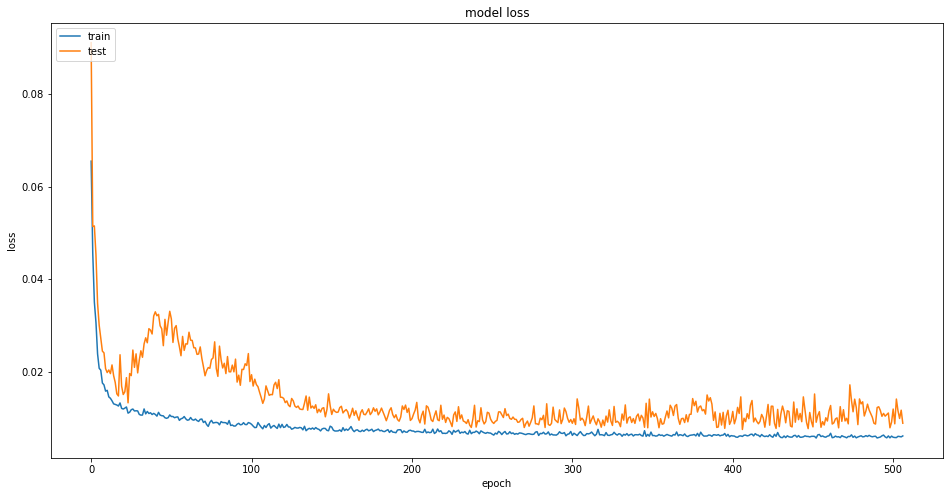

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8)) 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Point_Tl22h_TrainingandValidation Loss4.png')
plt.show()

#print(get_flops(model))

In [11]:
trainPredict = model.predict(trX, batch_size=batch_size)
validPredict = model.predict(vaX, batch_size=batch_size)
testPredict = model.predict(teX, batch_size=batch_size)

In [12]:
tePredict = testPredict.reshape([-1])
testY = teY.reshape([-1])

np.savetxt('Point_FullModel22h_testPredict4.txt', tePredict)
 
print('Error Test Score > RMSE == ', np.sqrt(np.mean(np.square(testY-tePredict))), ' MAE == ', mean_absolute_error(testY, tePredict), 'MAPE == ', mean_absolute_percentage_error(testY, tePredict))

Error Test Score > RMSE ==  0.009146284974512447  MAE ==  0.006811566262806571 MAPE ==  2.8594321462346795


In [13]:
layer_outputs = [layer.output for layer in model.layers if layer.name=='attention_vec']
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
attention_vectors = []
output_data = activation_model.predict(teX)
output_data = np.array(output_data)
print(output_data.shape)
at_vec = np.mean(output_data, axis=0)
print(at_vec, at_vec.shape)
np.savetxt('Attention_Fullmodel+ATT3.txt', at_vec)
at_vec = abs(at_vec)

C:\Users\Smartgrid_ML\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(23642, 22, 15)
[[-6.28875494e-02 -6.10010624e-02 -2.86436379e-02  3.30010355e-02
   4.11059260e-02  7.99179729e-03  2.11992767e-02  6.80442676e-02
  -5.51238805e-02 -1.38847465e-02 -6.24372959e-02 -6.74797818e-02
   7.65197426e-02  6.26843497e-02 -6.35888949e-02]
 [-3.17953043e-02 -4.02082056e-02  4.74848151e-02  1.40553355e-01
   1.50421888e-01  1.08878024e-01  1.25306681e-01  1.82719022e-01
   2.41113100e-02  8.06449056e-02 -4.11912724e-02 -2.72318609e-02
   1.80381730e-01  1.72398061e-01 -6.05431534e-02]
 [ 1.77896104e-03 -1.91648901e-02  6.23882823e-02  1.17645450e-01
   1.10833935e-01  1.10337272e-01  1.18310980e-01  1.04411744e-01
   1.17261797e-01  1.28694177e-01 -1.74787678e-02  1.91723704e-02
   8.71840790e-02  9.50134844e-02 -4.04394194e-02]
 [ 2.33047572e-03  4.58720286e-04  5.26917987e-02  1.69651031e-01
   1.81411237e-01  1.40881494e-01  1.47923231e-01  2.26806909e-01
   1.54049452e-02  7.97999352e-02 -7.48656457e-04 -3.85074504e-03
   2.49217287e-01  2.22117469e-01 -5.20

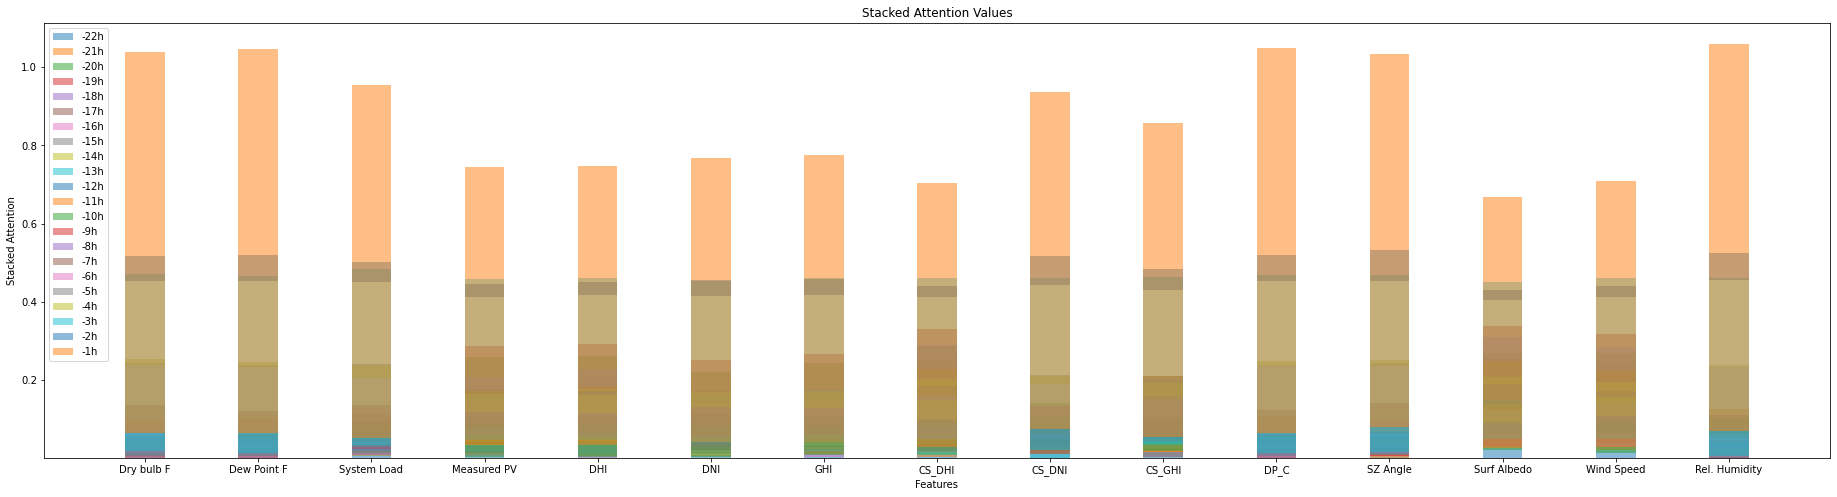

In [14]:
index=['Dry bulb F','Dew Point F', 'System Load', 'Measured PV','DHI','DNI','GHI','CS_DHI','CS_DNI','CS_GHI','DP_C','SZ Angle','Surf Albedo','Wind Speed', 'Rel. Humidity']

plt.figure(figsize=(32,8)) 
p1 = plt.bar(index, at_vec[0,:], width = 0.35, alpha=0.5)
p2 = plt.bar(index, at_vec[1,:], bottom=at_vec[0,:], width = 0.35, alpha=0.5)
p3 = plt.bar(index, at_vec[2,:], bottom=at_vec[1,:], width = 0.35, alpha=0.5)
p4 = plt.bar(index, at_vec[3,:], bottom=at_vec[2,:], width = 0.35, alpha=0.5)
p5 = plt.bar(index, at_vec[4,:], bottom=at_vec[3,:], width = 0.35, alpha=0.5)
p6 = plt.bar(index, at_vec[5,:], bottom=at_vec[4,:], width = 0.35, alpha=0.5)
p7 = plt.bar(index, at_vec[6,:], bottom=at_vec[5,:], width = 0.35, alpha=0.5)
p8 = plt.bar(index, at_vec[7,:], bottom=at_vec[6,:], width = 0.35, alpha=0.5)
p9 = plt.bar(index, at_vec[8,:], bottom=at_vec[7,:], width = 0.35, alpha=0.5)
p10 = plt.bar(index, at_vec[9,:], bottom=at_vec[8,:], width = 0.35, alpha=0.5)
p11 = plt.bar(index, at_vec[10,:], bottom=at_vec[9,:], width = 0.35, alpha=0.5)
p12 = plt.bar(index, at_vec[11,:], bottom=at_vec[10,:], width = 0.35, alpha=0.5)
p13 = plt.bar(index, at_vec[12,:], bottom=at_vec[11,:], width = 0.35, alpha=0.5)
p14 = plt.bar(index, at_vec[13,:], bottom=at_vec[12,:], width = 0.35, alpha=0.5)
p15 = plt.bar(index, at_vec[14,:], bottom=at_vec[13,:], width = 0.35, alpha=0.5)
p16 = plt.bar(index, at_vec[15,:], bottom=at_vec[14,:], width = 0.35, alpha=0.5)
p17 = plt.bar(index, at_vec[16,:], bottom=at_vec[15,:], width = 0.35, alpha=0.5)
p18 = plt.bar(index, at_vec[17,:], bottom=at_vec[16,:], width = 0.35, alpha=0.5)
p19 = plt.bar(index, at_vec[18,:], bottom=at_vec[17,:], width = 0.35, alpha=0.5)
p20 = plt.bar(index, at_vec[19,:], bottom=at_vec[18,:], width = 0.35, alpha=0.5)
p21 = plt.bar(index, at_vec[20,:], bottom=at_vec[19,:], width = 0.35, alpha=0.5)
p22 = plt.bar(index, at_vec[21,:], bottom=at_vec[20,:], width = 0.35, alpha=0.5)

plt.title('Stacked Attention Values')
plt.ylabel('Stacked Attention')
plt.xlabel('Features')
plt.legend(['-22h', '-21h', '-20h', '-19h', '-18h', '-17h', '-16h', '-15h', '-14h', '-13h', '-12h', '-11h', '-10h', '-9h', '-8h', '-7h', '-6h', '-5h', '-4h', '-3h', '-2h', '-1h'], loc='upper left')
plt.savefig('FullModel+ATT_StackedAttention4.png')
plt.show()

In [15]:
import shap
shap.initjs()
background = trX[np.random.choice(trX.shape[0], 300, replace=False)]
print(background.shape)
explainer = shap.DeepExplainer(model, background)
test_sample = trX[-100:]
shap_values = explainer.shap_values(background)

(300, 22, 15)



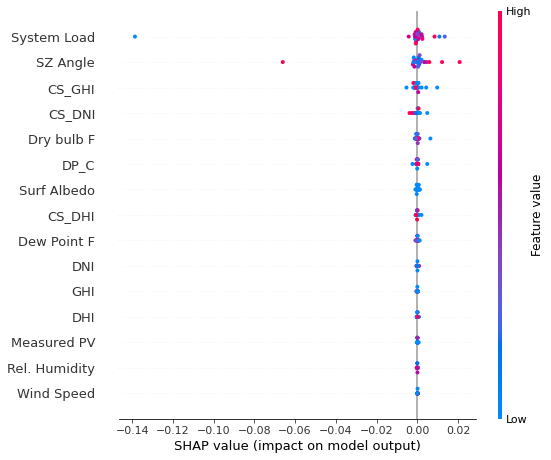

In [16]:
shap.summary_plot(shap_values[0][0], background[0], feature_names=index)
#shap.force_plot(explainer.expected_value[0], shap_values[0], feature_names=index)

In [17]:
shap_np = np.array(shap_values[0])
shap_np = shap_np.reshape(-1,num_features)
print("=========================================================================")
print(shap_np)
np.savetxt('SHAP_VALUES_Fullmodel+ATT4.txt', shap_np)

[[-2.03287564e-04  8.55149452e-05 -1.15400019e-03 ...  1.17063270e-05
   3.22028535e-05 -4.32625126e-05]
 [-6.93506546e-04  1.60756058e-04  7.63341305e-04 ... -2.73110892e-04
   1.32882657e-04  4.29535900e-05]
 [-7.94261844e-04  1.33270722e-04 -5.16189837e-05 ... -2.76785410e-04
   9.03163519e-05 -2.43784289e-05]
 ...
 [ 1.02551343e-03  1.74177069e-04 -4.25363712e-02 ... -1.88996501e-04
  -4.91062736e-05 -5.74100113e-05]
 [ 6.21480277e-04 -2.42090628e-04 -1.89226661e-02 ... -4.62836580e-05
  -1.36785057e-04 -3.41220111e-04]
 [-3.15887541e-03  3.02065205e-04  2.32209954e-01 ... -2.21557402e-04
   1.95177333e-05  3.79752749e-03]]


In [18]:
e_tr = trainPredict - trY
e_va = validPredict - vaY
errors = np.vstack([e_tr,e_va])
prediction = np.vstack([trainPredict,validPredict])
print(errors.shape)
print(prediction.shape)

(55174, 1)
(55174, 1)


In [19]:
df = pd.DataFrame(dataall[1:,:], columns=dataall[0,:])
df.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,36.0,29.0,12214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159.77,0.866,0.1,100.0
1,36.0,29.0,11573.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.7,0.866,0.1,100.0
2,35.0,29.0,11114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.23000000000002,0.866,0.1,100.0
3,35.0,30.0,10863.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.525,0.866,0.1,100.0
4,36.0,31.0,10827.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.47500000000001,0.866,0.1,100.0


In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df2 = norm_df.iloc[22:55174, :]
norm_df2 = norm_df2.reset_index()
norm_df2 = norm_df2.iloc[:,1:]
norm_df2.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.486486,0.63,0.264648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568807,0.944674,0.994825,0.05,1.0
1,0.495495,0.65,0.210093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568807,0.993539,0.994825,0.05,1.0
2,0.495495,0.66,0.164370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568807,0.998144,0.994825,0.05,1.0
3,0.486486,0.66,0.134292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568807,0.955240,0.994825,0.05,1.0
4,0.486486,0.66,0.118244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568807,0.887778,0.994825,0.05,1.0


In [21]:
norm_df2 = norm_df2.iloc[:,[0, 1, 2, 6, 7, 9, 10, 11, 12, 13]]
norm_df2.head()

,Dry bulb F,Dew Point F,System Load,GHI,CS_DHI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed
0,0.486486,0.63,0.264648,0.0,0.0,0.0,0.568807,0.944674,0.994825,0.05
1,0.495495,0.65,0.210093,0.0,0.0,0.0,0.568807,0.993539,0.994825,0.05
2,0.495495,0.66,0.164370,0.0,0.0,0.0,0.568807,0.998144,0.994825,0.05
3,0.486486,0.66,0.134292,0.0,0.0,0.0,0.568807,0.955240,0.994825,0.05
4,0.486486,0.66,0.118244,0.0,0.0,0.0,0.568807,0.887778,0.994825,0.05


In [22]:
Prindex = ['Prediction1']
Erindex = ['Error1']

pr_df = pd.DataFrame(prediction, columns=Prindex)
pr_df.head()

,Prediction1
0,0.257015
1,0.212701
2,0.171992
3,0.145354
4,0.127838


In [23]:
er_df = pd.DataFrame(errors, columns=Erindex)
er_df.head()

,Error1
0,-0.007633
1,0.002607
2,0.007621
3,0.011062
4,0.009595


In [24]:
norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2.head()

,Dry bulb F,Dew Point F,System Load,GHI,CS_DHI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Prediction1,Error1
0,0.486486,0.63,0.264648,0.0,0.0,0.0,0.568807,0.944674,0.994825,0.05,0.257015,-0.007633
1,0.495495,0.65,0.210093,0.0,0.0,0.0,0.568807,0.993539,0.994825,0.05,0.212701,0.002607
2,0.495495,0.66,0.164370,0.0,0.0,0.0,0.568807,0.998144,0.994825,0.05,0.171992,0.007621
3,0.486486,0.66,0.134292,0.0,0.0,0.0,0.568807,0.955240,0.994825,0.05,0.145354,0.011062
4,0.486486,0.66,0.118244,0.0,0.0,0.0,0.568807,0.887778,0.994825,0.05,0.127838,0.009595


In [25]:
norm_df2 = np.array(norm_df2)
print(norm_df2.shape)
timesteps = 22
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps)
print(Xe.shape)
print(Ye.shape)

(55174, 12)
(55150, 22, 12)
(55150, 1, 12)


In [26]:
trXe = Xe[:50000, :, :]
vaXe = Xe[50000:, :, :]
trYe = Ye[:50000, :, -1:]
vaYe = Ye[50000:, :, -1:]
trYe = trYe.reshape(-1,1)
vaYe = vaYe.reshape(-1,1)
print(trXe.shape)
print(trYe.shape)
print(vaXe.shape)

(50000, 22, 12)
(50000, 1)
(5150, 22, 12)


In [27]:
with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1.2
    beta = 1.178511
    num_features = 12
    hfilters = 128
    hkernel_size1 = 2
    hkernel_size2 = 4
    visible1e = Input(shape=(timesteps, num_features))
    per1 = Permute((2,1))(visible1e)
    den1a = Dense(timesteps, activation='tanh')(per1)
    den1b = Dense(timesteps, activation='sigmoid')(per1)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vece')(den1)
    mul1 = Multiply()([visible1e, per2])
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res01 = Add()([d1, visible1e])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res02 = Add()([d1, res01])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res03 = Add()([d1, res02])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res04 =Add()([d1, res03])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res04)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=32)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res05 = Add()([d1, res04])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=32)(res05) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=16)(d1)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res06 = Add()([d1, res05])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=16)(res06) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res07 = Add()([d1, res06])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res07)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res08 = Add()([d1, res07])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res08)   
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)  
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    res09 = Add()([d1, res08])   # (100, 25) (100, 25)
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res09) 
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res10 = Add()([d1, res09])   # 
    
    print('res10 :', res10.shape)  # (None, 24, 11) 
    
    oute = Conv1D(512, 1, padding='same', activation='relu')(res10)   # 256, 11X10=110  
    oute = Dropout(0.2)(oute)   
    
    oute = Conv1D(256, 1, padding='same', activation='relu')(oute) # 512,  110X5=550
    oute = Dropout(0.2)(oute)  
    
    oute = GlobalAveragePooling1D()(oute) # pool_size=2, strides=1
    
    oute = Dense(1)(oute) 
    modele = Model(inputs=[visible1e], outputs=[oute])
    
    print(modele.summary())
    
    modele.compile(loss=root_mean_squared_error, optimizer='adam', metrics=[root_mean_squared_error, 'mse', 'mae', 'mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=100)
    batch_size = 100
    epochs = 1000

    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

res10 : (?, 22, 12)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 22, 12)]     0                                            
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 12, 22)       0           input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 12, 22)       506         permute_1[0][0]                  
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 12, 22)       506         permute_1[0][0]                  
________________________________________________________________________

In [28]:
    %%time
    histe = modele.fit(trXe, trYe, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaXe, vaYe), callbacks=[history, early_stopping])  # , checkpoint

Train on 50000 samples, validate on 5150 samples
Epoch 1/1000
50000/50000 [==============================] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.0083 - mean_squared_error: 2.0812e-04 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 601.2385  ETA: 8s - loss: 0.0128 - root_

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


50000/50000 [==============================] - 14s 271us/sample - loss: 0.0083 - root_mean_squared_error: 0.0083 - mean_squared_error: 2.0812e-04 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 601.2385 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0070 - val_mean_squared_error: 4.9633e-05 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 464.0967
Epoch 2/1000
50000/50000 [==============================] - 13s 253us/sample - loss: 0.0056 - root_mean_squared_error: 0.0056 - mean_squared_error: 3.6235e-05 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 327.5620 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0071 - val_mean_squared_error: 5.0541e-05 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 474.0980
Epoch 3/1000
50000/50000 [==============================] - 13s 262us/sample - loss: 0.0056 - root_mean_squared_error: 0.0056 - mean_squared_error: 3.7061e-05 - mean_absolute_error: 0.0044 - mean_abs

In [29]:
pr_df = pd.DataFrame(tePredict.reshape(-1,1), columns=Prindex)
pr_df.head()

,Prediction1
0,0.293923
1,0.254023
2,0.198017
3,0.144014
4,0.107147


In [30]:
teY = testY.reshape(-1,1)
e_te = testPredict-teY
print(teY.shape)
print(e_te.shape)
er_df = pd.DataFrame(e_te, columns=Erindex)
er_df.head()

(23642, 1)
(23642, 1)


,Error1
0,-0.005648
1,-0.003358
2,-0.001075
3,0.000436
4,-0.000449


In [31]:
norm_df2 = norm_df.iloc[55196:-2, :]
norm_df2 = norm_df2.reset_index()
norm_df2 = norm_df2.iloc[:,1:]
norm_df2.head()

,Dry bulb F,Dew Point F,System Load,Measured PV,DHI,DNI,GHI,CS_DHI,CS_DNI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Rel. Humidity
0,0.576577,0.70,0.299571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642202,0.625321,0.023286,0.05,0.996524
1,0.558559,0.69,0.257381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642202,0.683966,0.023286,0.05,0.978117
2,0.549550,0.68,0.199092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642202,0.727941,0.023286,0.05,1.000000
3,0.540541,0.68,0.143578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642202,0.751820,0.023286,0.05,1.000000
4,0.522523,0.69,0.107595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642202,0.751820,0.023286,0.05,1.000000


In [32]:
norm_df2 = norm_df2.iloc[:,[0, 1, 2, 6, 7, 9, 10, 11, 12, 13]]
norm_df2.head()

,Dry bulb F,Dew Point F,System Load,GHI,CS_DHI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed
0,0.576577,0.70,0.299571,0.0,0.0,0.0,0.642202,0.625321,0.023286,0.05
1,0.558559,0.69,0.257381,0.0,0.0,0.0,0.642202,0.683966,0.023286,0.05
2,0.549550,0.68,0.199092,0.0,0.0,0.0,0.642202,0.727941,0.023286,0.05
3,0.540541,0.68,0.143578,0.0,0.0,0.0,0.642202,0.751820,0.023286,0.05
4,0.522523,0.69,0.107595,0.0,0.0,0.0,0.642202,0.751820,0.023286,0.05


In [33]:
norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2.head()

,Dry bulb F,Dew Point F,System Load,GHI,CS_DHI,CS_GHI,DP_C,SZ Angle,Surf Albedo,Wind Speed,Prediction1,Error1
0,0.576577,0.70,0.299571,0.0,0.0,0.0,0.642202,0.625321,0.023286,0.05,0.293923,-0.005648
1,0.558559,0.69,0.257381,0.0,0.0,0.0,0.642202,0.683966,0.023286,0.05,0.254023,-0.003358
2,0.549550,0.68,0.199092,0.0,0.0,0.0,0.642202,0.727941,0.023286,0.05,0.198017,-0.001075
3,0.540541,0.68,0.143578,0.0,0.0,0.0,0.642202,0.751820,0.023286,0.05,0.144014,0.000436
4,0.522523,0.69,0.107595,0.0,0.0,0.0,0.642202,0.751820,0.023286,0.05,0.107147,-0.000449


In [34]:
norm_df2 = np.array(norm_df2)
print(norm_df2.shape)
timesteps = 22
output_timesteps = 1
teXe, teYe = create_dataset(norm_df2, timesteps, output_timesteps)
teYe = teYe[:,:,-1].reshape(-1,1)
print(teXe.shape)
print(teYe.shape)

(23642, 12)
(23618, 22, 12)
(23618, 1)


In [35]:
etePredict = modele.predict(teXe, batch_size=batch_size)
print(etePredict.shape)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


(23618, 1)


In [36]:
testPredict = tePredict.reshape(-1,1)
addtestPredict = -etePredict + testPredict[22:-2,:]
print(addtestPredict.shape)

(23618, 1)


In [37]:
print('Error Test Score > RMSE == ', np.sqrt(np.mean(np.square(teY[22:-2,:]-testPredict[22:-2,:]))), ' MAE == ', mean_absolute_error(teY[22:-2,:], testPredict[22:-2,:]), 'MAPE == ', mean_absolute_percentage_error(teY[22:-2,:], testPredict[22:-2,:]))
print('Error Test Score > RMSE == ', np.sqrt(np.mean(np.square(teY[22:-2,:]-addtestPredict))), ' MAE == ', mean_absolute_error(teY[22:-2,:], addtestPredict), 'MAPE == ', mean_absolute_percentage_error(teY[22:-2,:], addtestPredict))

Error Test Score > RMSE ==  0.009149224345664387  MAE ==  0.00681415842518793 MAPE ==  2.860576400010773
Error Test Score > RMSE ==  0.008431347055158831  MAE ==  0.006134544641244267 MAPE ==  2.4858602512867334


In [38]:
np.savetxt('FSEFF_EL_FinaltestPredictFF.txt', addtestPredict)

In [39]:
layer_outputs = [layer.output for layer in modele.layers if layer.name=='attention_vece']
activation_model = tf.keras.models.Model(inputs=modele.input, outputs=layer_outputs)
attention_vectors = []
output_data = activation_model.predict(trXe, batch_size=batch_size)
output_data = np.array(output_data)
print(output_data.shape)
at_vec = np.mean(output_data, axis=0)
print(at_vec, at_vec.shape)
np.savetxt('Attention_FSEFF_ELFSEFF_finalFF.txt', at_vec)
at_vec = abs(at_vec)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


(50000, 22, 12)
[[-0.0314404  -0.03518958  0.0228221   0.11509436  0.18044816  0.06744351
  -0.03843649 -0.02903564  0.19448619  0.21969917  0.02542334  0.29992554]
 [-0.03918167 -0.074967    0.04028764  0.05364067  0.13053077 -0.00113023
  -0.07248668 -0.07897461  0.11952201  0.17575952  0.04469717  0.21773033]
 [ 0.02202345  0.01621178  0.05925881  0.03379685  0.09230357  0.00364565
   0.01430354  0.01289524  0.12448467  0.11473887  0.06163399  0.08965296]
 [ 0.21100809  0.24580121  0.10227571  0.01653347  0.01726667  0.02362081
   0.24337968  0.15180753  0.06791554  0.01124827  0.10102586 -0.01530148]
 [-0.3796423  -0.44985425 -0.15692095 -0.03715781  0.0515625  -0.10439455
  -0.4475985  -0.29908606 -0.01830947  0.09525585 -0.15091133  0.16492361]
 [ 0.10870282  0.08684372  0.20307887  0.18487184  0.14680144  0.22436039
   0.08608559  0.13413653 -0.01002705 -0.00742726  0.20576468 -0.21828996]
 [-0.11641677 -0.12345042 -0.07415048  0.00843472 -0.0653975   0.05953962
  -0.1222967   0

In [40]:
import shap
shap.initjs()
background = trXe[np.random.choice(trXe.shape[0], 300, replace=False)]
print(background.shape)
explainer = shap.DeepExplainer(modele, background)
test_sample = trXe[-100:]
shap_values = explainer.shap_values(background)

(300, 22, 12)


In [41]:
index2 = np.concatenate([index, Prindex, Erindex])

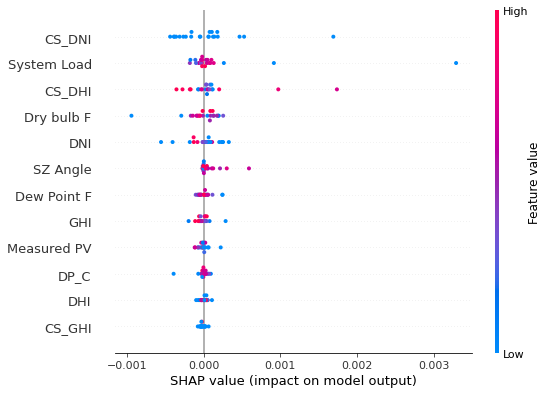

In [42]:
shap.summary_plot(shap_values[0][0], background[0], feature_names=index2)
#shap.force_plot(explainer.expected_value[0], shap_values[0], feature_names=index)

In [43]:
shap_np = np.array(shap_values[0])
shap_np = shap_np.reshape(-1,num_features)
print("=========================================================================")
print(shap_np)
np.savetxt('SHAP_VALUES_FSEFF_EL_FSEFFfinalFF.txt', shap_np)

[[ 1.73836040e-04 -4.48908801e-05 -1.06704961e-04 ... -4.58721674e-06
   5.85523287e-05  1.25920876e-04]
 [ 1.31384358e-04 -7.78037837e-05 -3.35728489e-05 ... -3.05546341e-05
   7.26835334e-05  5.87234524e-05]
 [ 9.18440019e-05 -5.88205856e-05 -3.31701571e-05 ... -2.24714742e-05
  -2.51449554e-05 -7.50176148e-06]
 ...
 [ 6.62723000e-06 -3.44356794e-05  8.00880085e-05 ...  3.32934651e-05
   3.81402103e-05 -6.49459539e-05]
 [ 1.14629837e-04 -5.72435842e-05  2.65995709e-04 ... -1.64436209e-06
   1.37008994e-05 -2.61882001e-05]
 [ 2.78013744e-04  7.57114094e-05 -6.24109680e-04 ...  6.01960296e-05
   1.75764516e-04 -1.56217914e-04]]
